# TCP Classification - Model Training and Evaluation

This notebook assumes the CapstoneProject_eda notebook was run to generate the cleaned and labeled data set.

## 1. Data Loading and Prep
In this section, we will load the cleaned data set and prepare it for model training. This involves splitting the data into training and testing sets and scaling the features.

### Load and Split Data
We load the cleaned dataset from a CSV file and split it into features (X) and target (y). Then, we further split the data into training and testing sets to evaluate our models later.

In [7]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Load dataset
data = pd.read_csv('data/cleaned_data.csv')

# Split into features (X) and target (y)
X = data.drop('label', axis=1)
y = data['label']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

### Data Scaling
We scale the features to ensure that they have a mean of 0 and a standard deviation of 1. This is important for many machine learning algorithms to perform well.

In [2]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

## 2. Modeling
In this section, we will train different machine learning models and evaluate their performance using cross-validation.

### Imports
We import the necessary libraries for model training and evaluation.

In [3]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import make_scorer, f1_score

f1_scorer = make_scorer(f1_score, average='weighted')

### Logistic Regression
We train a Logistic Regression model and evaluate its performance using 5-fold cross-validation with the F1-score as the evaluation metric.

In [13]:
logistic_model = LogisticRegression(max_iter=100, random_state=42, n_jobs=-1)

logistic_cv_scores = cross_val_score(logistic_model, X, y, cv=5, scoring=f1_scorer, n_jobs=-1)

### Random Forest
We train a Random Forest model and evaluate its performance using 5-fold cross-validation with the F1-score as the evaluation metric.

In [11]:
rf_model = RandomForestClassifier(n_estimators=10, random_state=42, n_jobs=-1)

rf_cv_scores = cross_val_score(rf_model, X, y, cv=5, scoring=f1_scorer, n_jobs=-1)

### SVM
We train a Support Vector Machine (SVM) model and evaluate its performance using 5-fold cross-validation with the F1-score as the evaluation metric.

In [9]:
svm_model = SVC(kernel='linear', random_state=42)

svm_cv_scores = cross_val_score(svm_model, X, y, cv=2, scoring=f1_scorer, n_jobs=-1)

### F1 Scores
We print the cross-validation F1 scores for each model and their mean F1 scores to compare their performance.

In [15]:
print(f"Logistic Regression CV F1 Scores: {logistic_cv_scores}")
print(f"Logistic Regression Mean F1 Score: {logistic_cv_scores.mean()}")

print(f"Random Forest CV F1 Scores: {rf_cv_scores}")
print(f"Random Forest Mean F1 Score: {rf_cv_scores.mean()}")

print(f"SVM CV F1 Scores: {svm_cv_scores}")
print(f"SVM Mean F1 Score: {svm_cv_scores.mean()}")

Logistic Regression CV F1 Scores: [0.93886223 0.92661224 0.9179587  0.92182393 0.93852557]
Logistic Regression Mean F1 Score: 0.9287565338961004
Random Forest CV F1 Scores: [1. 1. 1. 1. 1.]
Random Forest Mean F1 Score: 1.0
SVM CV F1 Scores: [1. 1.]
SVM Mean F1 Score: 1.0


### Visualization of Model Performance

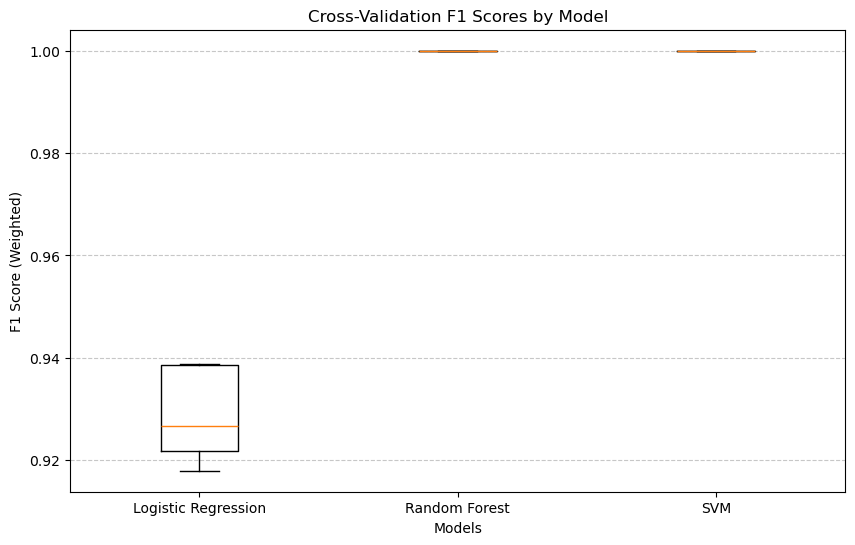

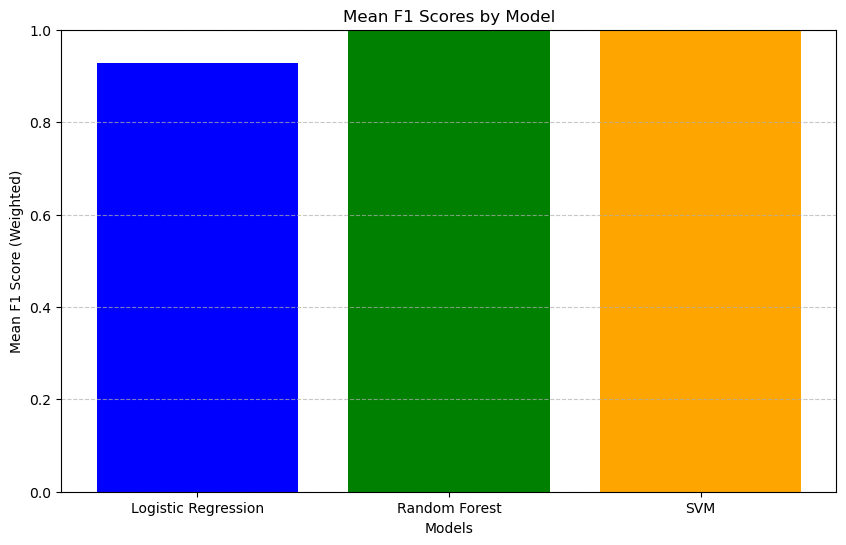

In [18]:
import matplotlib.pyplot as plt
import numpy as np

# F1 scores for each model
models = ['Logistic Regression', 'Random Forest', 'SVM']
mean_scores = [logistic_cv_scores.mean(), rf_cv_scores.mean(), svm_cv_scores.mean()]
all_scores = [logistic_cv_scores, rf_cv_scores, svm_cv_scores]

# Create a boxplot for individual CV F1 scores
plt.figure(figsize=(10, 6))
plt.boxplot(all_scores, labels=models)
plt.title('Cross-Validation F1 Scores by Model')
plt.ylabel('F1 Score (Weighted)')
plt.xlabel('Models')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# Create a bar chart for mean F1 scores
plt.figure(figsize=(10, 6))
plt.bar(models, mean_scores, color=['blue', 'green', 'orange'])
plt.title('Mean F1 Scores by Model')
plt.ylabel('Mean F1 Score (Weighted)')
plt.xlabel('Models')
plt.ylim(0, 1)  # Assuming F1 scores range between 0 and 1
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

## 3. Hyperparameter Tuning
As both the Random Forest Model and SVM achieved a F1 score of 1.0 and Logistic Regression got a mean F1-Score of .929, a hyper-paramter analysis of the models was not needed.

## 4. Interpretation of Model's Results
The cross-validation results show differing performance levels among the models. Starting with Logistic Regression, the F1 scores remain consistently high across all folds, ranging from approximately 0.918 to 0.939. With a mean F1 score of 0.929, Logistic Regression demonstrates reliable and solid classification performance, although it does not achieve perfection.

In contrast, both the Random Forest and SVM models achieved perfect F1 scores of 1.0 in every fold, indicating flawless classification during the cross-validation process. However, such results may suggest potential overfitting, particularly with Random Forest, as it might be excessively tailored to the training data.

It's also important to note that the SVM model was evaluated using only two folds during cross-validation. This limited number of folds could contribute to its observed consistency, so those results should be interpreted with caution.

Overall, while Random Forest and SVM appear to outperform others in this context, their ability to generalize to unseen data needs careful examination to ensure their performance extends beyond the current dataset.

## 5. Explanation and Rationale for the Evaluation Metric
In this section, I discuss why the F1-score was chosen as the evaluation metric for this classification task and its importance in balancing precision and recall.

### Evaluation Metric: F1-Score
The F1-score was chosen as the evaluation metric for this classification task. The F1-score is the harmonic mean of precision and recall, providing a metric that balances false positives and false negatives. This is particularly important for imbalanced datasets where one class may be more frequent than the other. By using the F1-score, I ensure that the model performs well in identifying both the positive and negative classes, providing a more robust evaluation of the model's performance.